In [1]:
import os

if os.name == 'nt':
    %env DOC=C:\Users\BK\Documents
else:
    %env DOC=/Users/muuzh/Documents

from AMI import automutual_info_single, automutual_info, automutual_info_k1

env: DOC=C:\Users\BK\Documents
C:\Users\BK\Documents\JIDT\infodynamics.jar


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm, trange
from tqdm.contrib import tenumerate
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import seaborn as sns
import pandas as pd
import time
import itertools
import scipy.stats as stats
import jpype
import datasets as datasets


In [3]:
def poincare_plot(data, stride=1):
    """
    Create a Poincare plot from a time series.

    Parameters
    ----------
    data : array_like
        The time series data.
    stride : int, optional
        The stride between consecutive points in the time series. Default is 1.

    Returns
    -------
    tuple
        A tuple containing the x and y coordinates of the Poincare plot.
    """
    x = data[:-stride]
    y = data[stride:]
    return x, y

In [4]:
a_num = 500

lag1para = np.linspace(-1, 1, a_num)
ARpara = [np.r_[1, -arparams] for arparams in lag1para]
series_length = 2200

# Generate data
ARmatrix = np.array([ArmaProcess(ar, [1]).generate_sample(nsample=series_length) for ar in tqdm(ARpara)])




  0%|          | 0/500 [00:00<?, ?it/s]

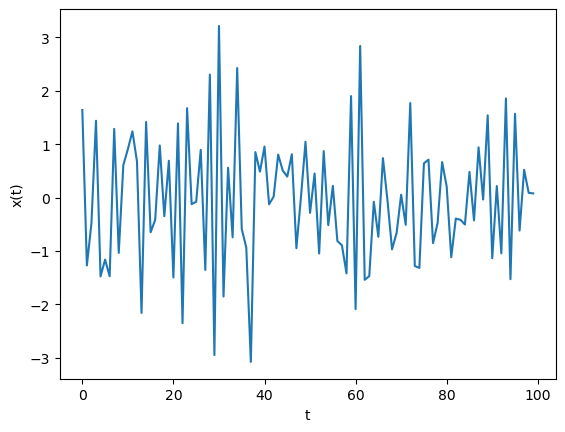

In [31]:
sample_series = ARmatrix[100][:100]
plt.plot(sample_series)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()


In [32]:
x_start = 0.1
series_length = 2200
tent_a_num = 400
tent_logistic_num = 400

param_range_tent = np.linspace(1.001, 1.999, tent_a_num)
param_range_logistic = np.linspace(3.57, 4, tent_logistic_num)

tent_full_data = np.array([
    np.fromiter(datasets.tent_map(x_start, series_length, mu), dtype="float32")
    for mu in param_range_tent
])
logistic_full_data = np.array([
    np.fromiter(datasets.logistic_map(x_start, series_length, r), dtype="float32")
    for r in param_range_logistic
])

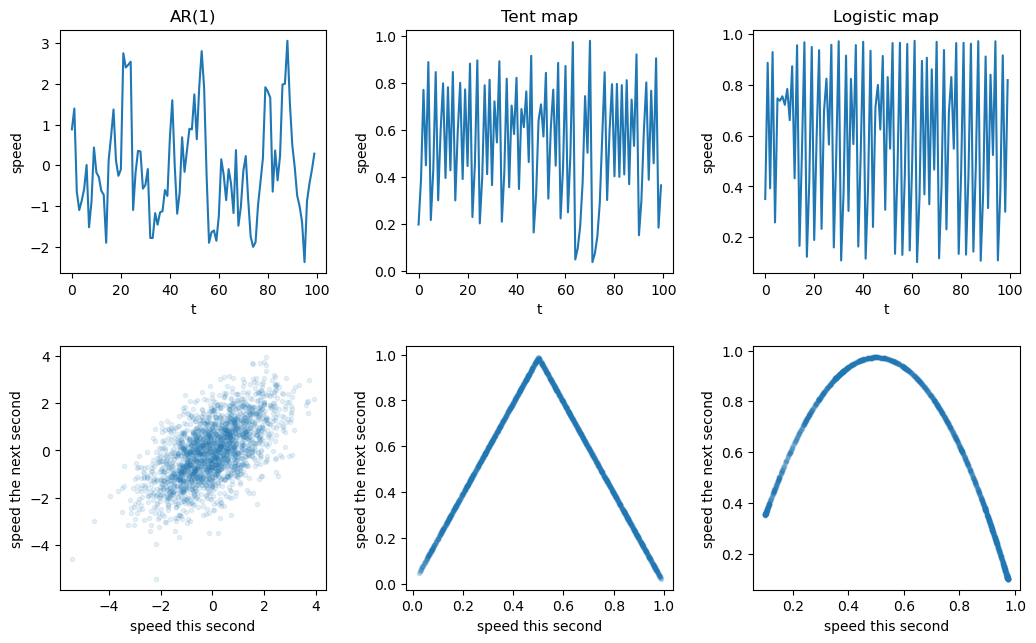

In [42]:
plt.figure(figsize=(12, 7))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

plotrange = 100
sampleidx = -100
sampleAR = ARmatrix[sampleidx]
plt.subplot(2, 3, 1)
plt.plot(sampleAR[:plotrange])
plt.xlabel('t')
plt.ylabel('speed')
# plt.title(r'$x_{t+1} = $' + '{0:.2g}'.format(lag1para[sampleidx]) + r'$x_t + \epsilon$')
plt.title('AR(1)')

sampleidx = -10
sampletent = tent_full_data[sampleidx]
plt.subplot(2, 3, 2)
plt.plot(sampletent[:plotrange])
plt.xlabel('t')
plt.ylabel('speed')
# plt.title(r'$x_{t+1} = $' + '{0:.2g}'.format(param_range_tent[sampleidx]) + r'$x_t if \ x_t < 0.5 else$' + '{0:.2g}'.format(param_range_tent[sampleidx]) + r'*$(1-x_t)$')
plt.title('Tent map')

sampleidx = -100
samplelogistic = logistic_full_data[sampleidx]
plt.subplot(2, 3, 3)
plt.plot(samplelogistic[:plotrange])
plt.xlabel('t')
plt.ylabel('speed')
# plt.title(r'$x_{t+1} = $' + '{0:.2g}'.format(param_range_logistic[sampleidx]) + r'$x_t(1-x_t)$')
plt.title('Logistic map')



plt.subplot(2, 3, 4)
x, y = poincare_plot(sampleAR, stride=1)
plt.scatter(x, y, marker='.',alpha=0.1)
plt.xlabel("speed this second")
plt.ylabel("speed the next second")
# plt.title("Poincare plot of AR")



plt.subplot(2, 3, 5)
x, y = poincare_plot(sampletent, stride=1)
plt.scatter(x, y, marker='.',alpha=0.1)
plt.xlabel("speed this second")
plt.ylabel("speed the next second")
# plt.title("Poincare plot of tent map")

plt.subplot(2, 3, 6)
x, y = poincare_plot(samplelogistic, stride=1)
plt.scatter(x, y, marker='.',alpha=0.1)
plt.xlabel("speed this second")
plt.ylabel("speed the next second")
# plt.title("Poincare plot of logistic map")
plt.show()

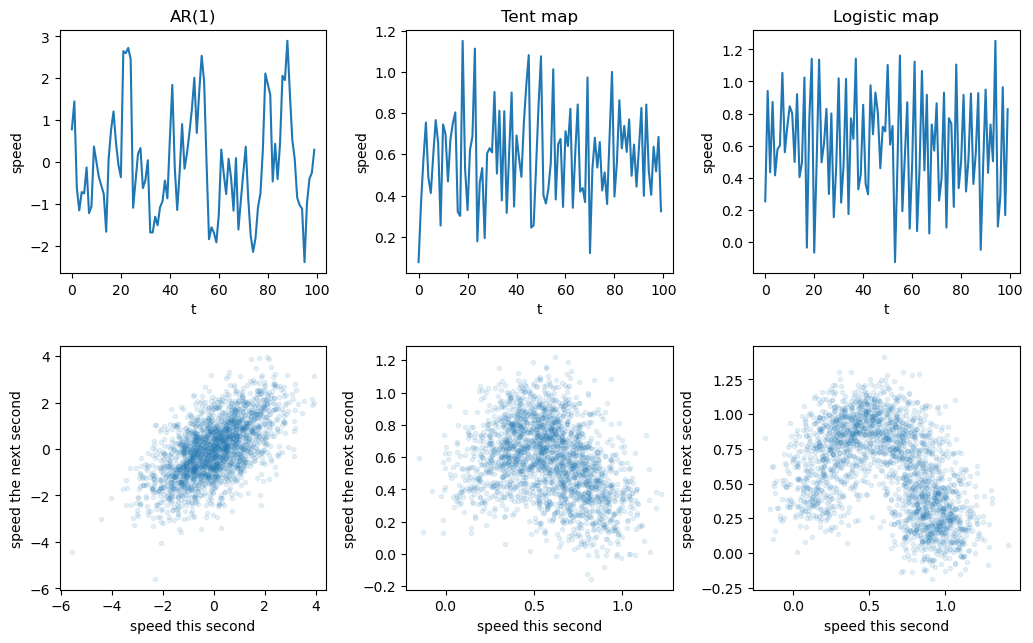

In [43]:
noise = np.random.normal(0, np.mean(tent_full_data)*0.25, series_length)
ARmatrix_noisy = ARmatrix + noise
tent_full_data_noisy = tent_full_data + noise
logistic_full_data_noisy = logistic_full_data + noise

plt.figure(figsize=(12, 7))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

plotrange = 100
sampleidx = -100
sampleAR = ARmatrix_noisy[sampleidx]
plt.subplot(2, 3, 1)
plt.plot(sampleAR[:plotrange])
plt.xlabel('t')
plt.ylabel('speed')
# plt.title(r'$x_{t+1} = $' + '{0:.2g}'.format(lag1para[sampleidx]) + r'$x_t + \epsilon$')
plt.title('AR(1)')

sampleidx = -100
sampletent = tent_full_data_noisy[sampleidx]
plt.subplot(2, 3, 2)
plt.plot(sampletent[:plotrange])
plt.xlabel('t')
plt.ylabel('speed')
# plt.title(r'$x_{t+1} = $' + '{0:.2g}'.format(param_range_tent[sampleidx]) + r'$x_t if \ x_t < 0.5 else$' + '{0:.2g}'.format(param_range_tent[sampleidx]) + r'*$(1-x_t)$')
plt.title('Tent map')

sampleidx = -100
samplelogistic = logistic_full_data_noisy[sampleidx]
plt.subplot(2, 3, 3)
plt.plot(samplelogistic[:plotrange])
plt.xlabel('t')
plt.ylabel('speed')
# plt.title(r'$x_{t+1} = $' + '{0:.2g}'.format(param_range_logistic[sampleidx]) + r'$x_t(1-x_t)$')
plt.title('Logistic map')



plt.subplot(2, 3, 4)
x, y = poincare_plot(sampleAR, stride=1)
plt.scatter(x, y, marker='.',alpha=0.1)
plt.xlabel("speed this second")
plt.ylabel("speed the next second")
# plt.title("Poincare plot of AR")



plt.subplot(2, 3, 5)
x, y = poincare_plot(sampletent, stride=1)
plt.scatter(x, y, marker='.',alpha=0.1)
plt.xlabel("speed this second")
plt.ylabel("speed the next second")
# plt.title("Poincare plot of tent map")

plt.subplot(2, 3, 6)
x, y = poincare_plot(samplelogistic, stride=1)
plt.scatter(x, y, marker='.',alpha=0.1)
plt.xlabel("speed this second")
plt.ylabel("speed the next second")
# plt.title("Poincare plot of logistic map")
plt.show()

array([[-0.02174433,  0.67587373, -0.03549084, ...,  0.17817167,
         0.1299827 , -0.02668899],
       [-0.0214942 ,  0.6763751 , -0.03473708, ...,  0.17815349,
         0.13125157, -0.02671283],
       [-0.02124408,  0.67687773, -0.03397955, ...,  0.18115471,
         0.12948298, -0.0237236 ],
       ...,
       [ 0.07755543,  0.97327621,  0.65702747, ...,  0.13592423,
         0.54229479, -0.35281783],
       [ 0.07780554,  0.97427435,  0.66001474, ...,  0.52457116,
        -0.06387214,  0.08547343],
       [ 0.07805567,  0.97527371,  0.66300945, ...,  0.07440318,
         0.42160421, -0.11112117]])

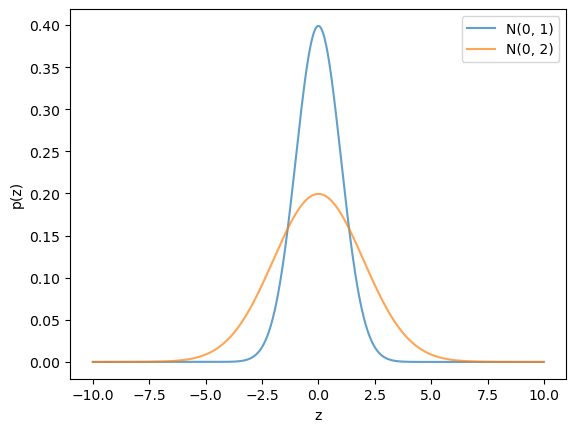

In [46]:
from scipy.stats import norm

# 设定正态分布的参数
mu1, sigma1 = 0, 1  # 均值和标准差
mu2, sigma2 = 0, 2

# 生成x轴数据，从-10到10，间隔为0.01
x = np.arange(-10, 10, 0.01)

# 计算两个正态分布的概率密度函数值
pdf1 = norm.pdf(x, mu1, sigma1)
pdf2 = norm.pdf(x, mu2, sigma2)

# 绘制图像
plt.plot(x, pdf1, label='N({}, {})'.format(mu1, sigma1), alpha=0.7)
plt.plot(x, pdf2, label='N({}, {})'.format(mu2, sigma2), alpha=0.7)
plt.xlabel('z')
plt.ylabel('p(z)')

# 添加图例
plt.legend()

# 显示图像
plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

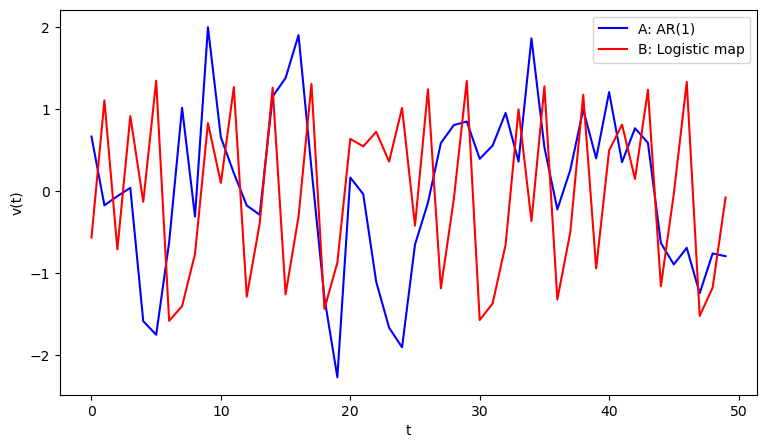

<Figure size 640x480 with 0 Axes>

In [120]:
a_num = 500

lag1para = np.linspace(-1, 1, a_num)
ARpara = [np.r_[1, -arparams] for arparams in lag1para]
series_length = 2200

# Generate data
ARmatrix = np.array([ArmaProcess(ar, [1]).generate_sample(nsample=series_length) for ar in tqdm(ARpara)])


x_start = 0.1
series_length = 2200
tent_a_num = 400
tent_logistic_num = 400

param_range_tent = np.linspace(1.001, 1.999, tent_a_num)
param_range_logistic = np.linspace(3.57, 4, tent_logistic_num)

tent_full_data = np.array([
    np.fromiter(datasets.tent_map(x_start, series_length, mu), dtype="float32")
    for mu in param_range_tent
])
logistic_full_data = np.array([
    np.fromiter(datasets.logistic_map(x_start, series_length, r), dtype="float32")
    for r in param_range_logistic
])



sampleAR = ARmatrix[350]
samplelogistic = logistic_full_data[-20]
plotrange = 50
t = np.arange(plotrange)

zscoredAR = (sampleAR - sampleAR.mean()) / sampleAR.std()
zscoredlogistic = (samplelogistic - samplelogistic.mean()) / samplelogistic.std()


plt.figure(figsize=(9, 5))
plt.plot(t, zscoredAR[:plotrange], c = 'b', label='A: AR(1)')
plt.plot(t, zscoredlogistic[:plotrange], c = 'r', label='B: Logistic map')
plt.legend()
plt.xlabel('t')
plt.ylabel('v(t)')
plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


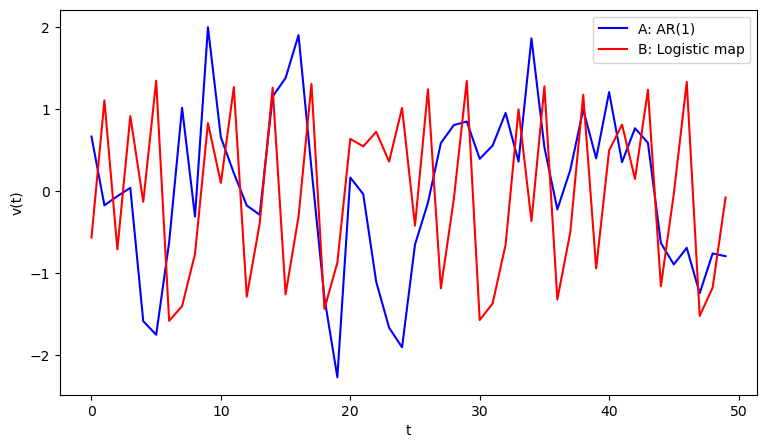

In [125]:
plt.figure(figsize=(9, 5))
plt.plot(t, zscoredAR[:plotrange], c = 'b', label='A: AR(1)')
plt.plot(t, zscoredlogistic[:plotrange], c = 'r', label='B: Logistic map')
plt.legend()
plt.xlabel('t')
plt.ylabel('v(t)')
plt.savefig('p1_1.eps', format='eps', dpi=1000)
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


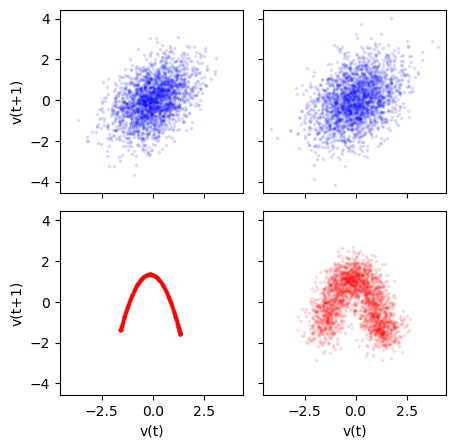

In [126]:
# plot four poincare plots
noise = np.random.normal(0, 0.45, series_length)

ARnoisy = zscoredAR + noise
logisticnoisy = zscoredlogistic + noise

to_plot = [zscoredAR, ARnoisy, zscoredlogistic, logisticnoisy]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5),sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        ax.set_aspect('equal')
        idx = i*2 + j
        x, y = poincare_plot(to_plot[idx], stride=1)
        if i == 0:
            c = 'b'
        else:
            c = 'r'
        ax.scatter(x, y, marker='.',alpha=0.1, s=10, c=c)
        if i == 1:
            ax.set_xlabel('v(t)')
        if j == 0:
            ax.set_ylabel('v(t+1)')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('p1-2.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
    \begin{subfigure}{0.7\textwidth}
        \centering
        \includegraphics[width=\linewidth]{./figures/p2_theory/p1_1.eps}
        \caption{Average velocity at each second}
    \end{subfigure}%
    ~ 
    \begin{subfigure}{0.4\textwidth}
        \centering
        \includegraphics[width=\linewidth]{./figures/p2_theory/p1_2.eps}
        \caption{Poincar\'e plots}
    \end{subfigure}